# Notebook to Balance Data and apply PCA

In [1]:
import pandas as pd
import numpy as np

# Load dataset
dataset = pd.read_csv('dataset/train.csv')
X = dataset.iloc[:, 2:59].values
y = dataset.iloc[:, 1].values

#dataset_test = pd.read_csv('dataset/test.csv')
#X_test = dataset_test.iloc[:, 2:59].values
#y_test = dataset_test.iloc[:, 1].values

In [2]:
data_target = dataset['target']

value_0, value_1 = data_target.value_counts()
target_count = value_0 + value_1
print(target_count)
print(value_0/float(target_count))

595212
0.963552482141


In [3]:
print('Percent of 0 in target = {}'.format(float(value_0/float(target_count))))
print('Percent of 1 in target = {}'.format(float(value_1/float(target_count))))
class_0_bigger_than_1 = int(value_0/value_1)
print('How many time class 0 is bigger than classe 1: {}'.format(class_0_bigger_than_1))

Percent of 0 in target = 0.963552482141
Percent of 1 in target = 0.0364475178592
How many time class 0 is bigger than classe 1: 26


In [4]:
#replicate the data where target equals 1, so we can balance the data
rows_target_1 = dataset[dataset['target']==1]
for i in range(class_0_bigger_than_1):
    dataset = dataset.append(rows_target_1)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#data_target_test = dataset_test['target']
y = dataset.iloc[:, 1].values

dataset_rescaled = sc.fit_transform(dataset.as_matrix())

columns_from_dataset = dataset.columns.values.tolist()

dataset = pd.DataFrame(dataset_rescaled, columns = columns_from_dataset)

In [6]:
dataset

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,-1.730128,-1.010597,0.003703,0.938485,0.189455,1.151421,-0.334766,-0.737292,1.547986,-0.462316,...,1.518484,-0.364926,1.256939,0.164280,-0.372806,0.768668,0.897301,-0.635699,-0.728878,2.358759
1,-1.730124,-1.010597,-0.492659,-0.542899,0.917821,-0.862772,-0.334766,-0.737292,-0.646001,2.163024,...,-1.043313,-0.364926,-1.103947,0.528041,-0.372806,0.768668,0.897301,-0.635699,1.371973,-0.423952
2,-1.730114,-1.010597,1.492788,3.901253,1.646187,1.151421,-0.334766,-0.737292,-0.646001,2.163024,...,-0.616347,0.467270,2.437381,-0.199482,-0.372806,0.768668,0.897301,-0.635699,1.371973,-0.423952
3,-1.730107,-1.010597,-0.989021,-0.542899,-0.903095,-0.862772,-0.334766,1.356314,-0.646001,-0.462316,...,-1.470279,0.467270,0.666717,0.528041,-0.372806,-1.300952,-1.114453,-0.635699,-0.728878,-0.423952
4,-1.730105,-1.010597,-0.989021,0.938485,-1.631461,1.151421,-0.334766,1.356314,-0.646001,-0.462316,...,-1.043313,-0.364926,-1.103947,-1.654530,-0.372806,-1.300952,-1.114453,1.573070,1.371973,-0.423952
5,-1.730100,-1.010597,1.492788,-0.542899,-0.174728,-0.862772,-0.334766,-0.737292,-0.646001,-0.462316,...,-0.616347,0.467270,-1.694168,0.528041,-0.372806,0.768668,-1.114453,1.573070,1.371973,2.358759
6,-1.730098,-1.010597,0.003703,-0.542899,-0.538912,1.151421,-0.334766,-0.737292,1.547986,-0.462316,...,-1.043313,-1.197121,-1.694168,0.891803,-0.372806,0.768668,-1.114453,-0.635699,1.371973,-0.423952
7,-1.730094,-1.010597,1.492788,-0.542899,-0.174728,-0.862772,-0.334766,1.356314,-0.646001,-0.462316,...,0.664552,-0.364926,0.076496,-0.563244,2.682360,-1.300952,0.897301,-0.635699,1.371973,-0.423952
8,-1.730084,-1.010597,1.492788,-0.542899,-0.538912,1.151421,-0.334766,-0.737292,-0.646001,2.163024,...,-0.616347,0.467270,-1.103947,-0.927006,-0.372806,0.768668,-1.114453,-0.635699,-0.728878,2.358759
9,-1.730080,0.989514,-0.492659,-0.542899,-0.903095,-0.862772,-0.334766,-0.737292,1.547986,-0.462316,...,-1.043313,2.963856,-1.694168,-0.563244,-0.372806,0.768668,-1.114453,-0.635699,1.371973,-0.423952


In [7]:
dataset.columns.values.tolist()

['id',
 'target',
 'ps_ind_01',
 'ps_ind_02_cat',
 'ps_ind_03',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_14',
 'ps_ind_15',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

In [8]:
#id is useless for this problem, so we remove it
del dataset['id']

In [9]:
dataset.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,-1.010597,0.003703,0.938485,0.189455,1.151421,-0.334766,-0.737292,1.547986,-0.462316,-0.464226,...,1.518484,-0.364926,1.256939,0.164280,-0.372806,0.768668,0.897301,-0.635699,-0.728878,2.358759
1,-1.010597,-0.492659,-0.542899,0.917821,-0.862772,-0.334766,-0.737292,-0.646001,2.163024,-0.464226,...,-1.043313,-0.364926,-1.103947,0.528041,-0.372806,0.768668,0.897301,-0.635699,1.371973,-0.423952
2,-1.010597,1.492788,3.901253,1.646187,1.151421,-0.334766,-0.737292,-0.646001,2.163024,-0.464226,...,-0.616347,0.467270,2.437381,-0.199482,-0.372806,0.768668,0.897301,-0.635699,1.371973,-0.423952
3,-1.010597,-0.989021,-0.542899,-0.903095,-0.862772,-0.334766,1.356314,-0.646001,-0.462316,-0.464226,...,-1.470279,0.467270,0.666717,0.528041,-0.372806,-1.300952,-1.114453,-0.635699,-0.728878,-0.423952
4,-1.010597,-0.989021,0.938485,-1.631461,1.151421,-0.334766,1.356314,-0.646001,-0.462316,-0.464226,...,-1.043313,-0.364926,-1.103947,-1.654530,-0.372806,-1.300952,-1.114453,1.573070,1.371973,-0.423952


In [10]:
dataset.columns.values.tolist()

['target',
 'ps_ind_01',
 'ps_ind_02_cat',
 'ps_ind_03',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_14',
 'ps_ind_15',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

In [11]:
#save column name in a variable
dataset_columns = dataset.columns.values.tolist()

In [12]:
#filter columns with categorical variables
filter(lambda k: '_cat' not in k, dataset_columns)

['target',
 'ps_ind_01',
 'ps_ind_03',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_14',
 'ps_ind_15',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

In [13]:
#create a new dataset without the categorical variables
df_no_cat_filter = dataset[filter(lambda k: '_cat' not in k, dataset_columns)]
df_cat = dataset[filter(lambda k: '_cat' in k, dataset_columns)]
del df_no_cat_filter['target']

In [14]:
df_no_cat_filter.head()

,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0.003703,0.189455,-0.737292,1.547986,-0.462316,-0.464226,-0.021467,-0.043635,-0.107041,-0.033738,...,1.518484,-0.364926,1.256939,0.164280,-0.372806,0.768668,0.897301,-0.635699,-0.728878,2.358759
1,-0.492659,0.917821,-0.737292,-0.646001,2.163024,-0.464226,-0.021467,-0.043635,-0.107041,-0.033738,...,-1.043313,-0.364926,-1.103947,0.528041,-0.372806,0.768668,0.897301,-0.635699,1.371973,-0.423952
2,1.492788,1.646187,-0.737292,-0.646001,2.163024,-0.464226,-0.021467,-0.043635,-0.107041,-0.033738,...,-0.616347,0.467270,2.437381,-0.199482,-0.372806,0.768668,0.897301,-0.635699,1.371973,-0.423952
3,-0.989021,-0.903095,1.356314,-0.646001,-0.462316,-0.464226,-0.021467,-0.043635,-0.107041,-0.033738,...,-1.470279,0.467270,0.666717,0.528041,-0.372806,-1.300952,-1.114453,-0.635699,-0.728878,-0.423952
4,-0.989021,-1.631461,1.356314,-0.646001,-0.462316,-0.464226,-0.021467,-0.043635,-0.107041,-0.033738,...,-1.043313,-0.364926,-1.103947,-1.654530,-0.372806,-1.300952,-1.114453,1.573070,1.371973,-0.423952


In [15]:
df_no_cat_filter.shape

(1159256, 43)

In [16]:
df_cat.head()

,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat
0,0.938485,1.151421,-0.334766,0.625397,0.499531,-0.679239,-0.377518,1.319962,-0.491560,0.297595,-2.085484,-1.381091,0.084292,-1.524331
1,-0.542899,-0.862772,-0.334766,1.015767,0.499531,-0.679239,-0.377518,-1.050045,0.776226,0.297595,0.479505,0.677286,0.084292,-1.313962
2,3.901253,1.151421,-0.334766,-0.545712,0.499531,-0.679239,-0.377518,-1.050045,1.319562,0.297595,0.479505,0.677286,0.084292,-0.081799
3,-0.542899,-0.862772,-0.334766,-0.545712,0.499531,0.535798,-0.377518,1.319962,0.776226,0.297595,0.479505,1.706475,0.084292,1.240523
4,0.938485,1.151421,-0.334766,1.015767,0.499531,-0.679239,-0.377518,-1.050045,1.319562,0.297595,0.479505,0.677286,0.084292,0.579362


In [17]:
#PCA to reduce dimensions of the dataset - in the other Jupyter we estimated 20 components to
#explain 97% of the data
from sklearn import decomposition

pca = decomposition.PCA(n_components=30)
pca.fit(df_no_cat_filter)
df_no_cat_filter = pca.transform(df_no_cat_filter)
df_no_cat_filter.shape

(1159256, 30)

<function matplotlib.pyplot.show>

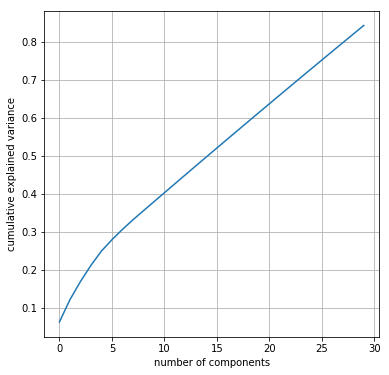

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.grid()
plt.show

In [19]:
df_no_cat_filter.shape

(1159256, 30)

In [20]:
df_cat.head()

,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat
0,0.938485,1.151421,-0.334766,0.625397,0.499531,-0.679239,-0.377518,1.319962,-0.491560,0.297595,-2.085484,-1.381091,0.084292,-1.524331
1,-0.542899,-0.862772,-0.334766,1.015767,0.499531,-0.679239,-0.377518,-1.050045,0.776226,0.297595,0.479505,0.677286,0.084292,-1.313962
2,3.901253,1.151421,-0.334766,-0.545712,0.499531,-0.679239,-0.377518,-1.050045,1.319562,0.297595,0.479505,0.677286,0.084292,-0.081799
3,-0.542899,-0.862772,-0.334766,-0.545712,0.499531,0.535798,-0.377518,1.319962,0.776226,0.297595,0.479505,1.706475,0.084292,1.240523
4,0.938485,1.151421,-0.334766,1.015767,0.499531,-0.679239,-0.377518,-1.050045,1.319562,0.297595,0.479505,0.677286,0.084292,0.579362


In [21]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
df_cat_columns = df_cat.columns.values.tolist()

df_cat_one_hot = pd.get_dummies(df_cat, columns=df_cat_columns)

#for column in df_cat_columns:
#    dummies = pd.get_dummies(df_cat[column])
#    df_cat[dummies.columns] = dummies
    
#df_cat

In [23]:
print(df_cat_one_hot)
df_cat_one_hot_columns = df_cat_one_hot.columns.values.tolist()

         ps_ind_02_cat_-3.50566684916  ps_ind_02_cat_-0.542898730472  \
0                                   0                              0   
1                                   0                              1   
2                                   0                              0   
3                                   0                              1   
4                                   0                              0   
5                                   0                              1   
6                                   0                              1   
7                                   0                              1   
8                                   0                              1   
9                                   0                              1   
10                                  0                              0   
11                                  0                              1   
12                                  0                           

In [24]:
df_no_cat_with_filter = pd.DataFrame(df_no_cat_filter)
df_no_cat_with_filter_np = df_no_cat_with_filter.as_matrix()
df_cat_onde_hot_np = df_cat_one_hot.as_matrix()
print(df_no_cat_with_filter.shape)

(1159256, 30)


In [25]:
type(df_no_cat_with_filter_np)

final_dataset = np.concatenate((df_no_cat_with_filter_np, df_cat_onde_hot_np), axis=1)

In [26]:
final_dataset.shape

(1159256, 214)

In [27]:
df_no_cat_with_filter_np.shape

(1159256, 30)

In [28]:
df_cat_onde_hot_np.shape

(1159256, 184)

In [29]:
final_dataset

array([[ 1.01332772, -0.63784229, -1.00149107, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.08171955,  1.14374797,  0.21378705, ...,  0.        ,
         0.        ,  0.        ],
       [-2.11553595,  0.66754687, -1.51034624, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 1.39098483, -0.72449469, -0.78684598, ...,  0.        ,
         0.        ,  1.        ],
       [-0.32771102,  1.9525762 , -0.9062728 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.79902455, -0.46885358,  0.21848131, ...,  0.        ,
         0.        ,  0.        ]])

In [30]:
final_dataset.shape

(1159256, 214)

In [31]:
#np.savetxt("expanded_data_with_one_hot_encode.csv", final_dataset)

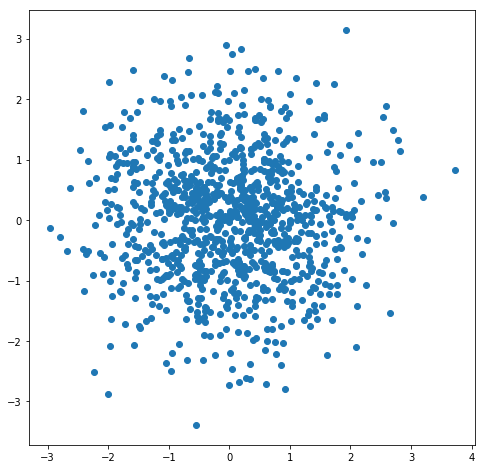

In [32]:
%matplotlib inline
plt.figure(figsize=(8,8))
plt.figure(1)
plt.clf()
plt.scatter(final_dataset[0:1000,10],final_dataset[0:1000,11])
plt.show()

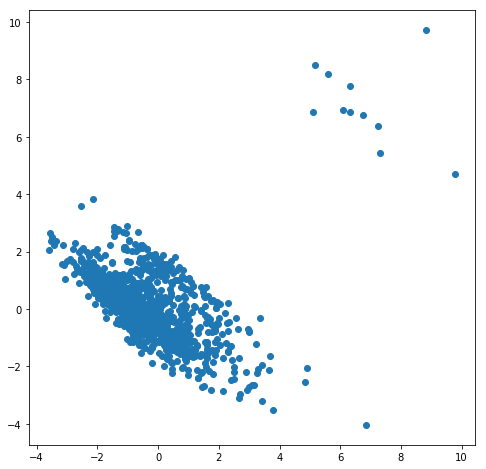

In [33]:
%matplotlib inline
plt.figure(figsize=(8,8))
plt.figure(1)
plt.clf()
plt.scatter(final_dataset[0:1000,0],final_dataset[0:1000,1])
plt.show()

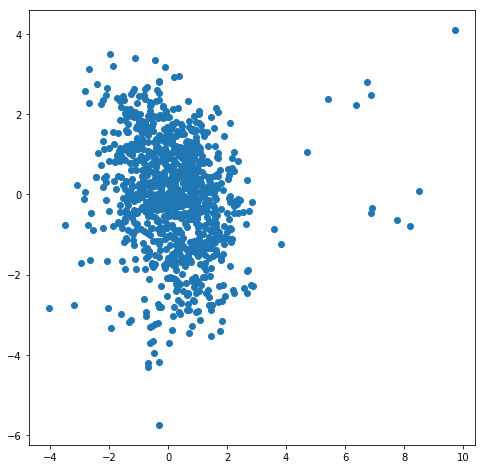

In [34]:
%matplotlib inline
plt.figure(figsize=(8,8))
plt.figure(1)
plt.clf()
plt.scatter(final_dataset[0:1000,1],final_dataset[0:1000,2])
plt.show()

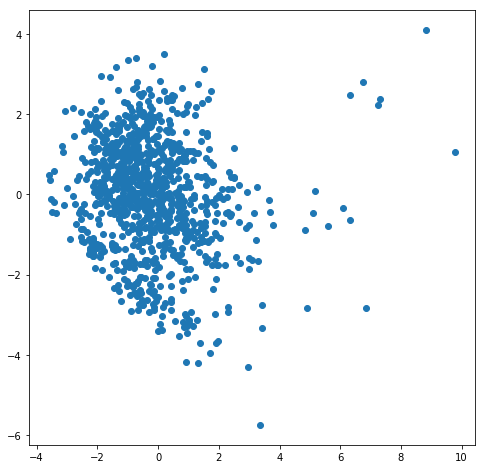

In [35]:
%matplotlib inline
plt.figure(figsize=(8,8))
plt.figure(1)
plt.clf()
plt.scatter(final_dataset[0:1000,0],final_dataset[0:1000,2])
plt.show()

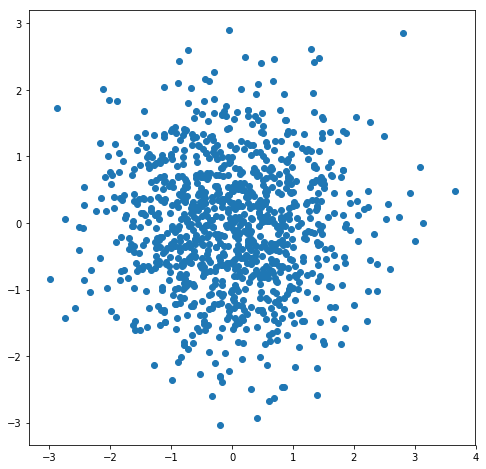

In [36]:
%matplotlib inline
plt.figure(figsize=(8,8))
plt.figure(1)
plt.clf()
plt.scatter(final_dataset[0:1000,18],final_dataset[0:1000,19])
plt.show()

In [37]:
final_dataset

array([[ 1.01332772, -0.63784229, -1.00149107, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.08171955,  1.14374797,  0.21378705, ...,  0.        ,
         0.        ,  0.        ],
       [-2.11553595,  0.66754687, -1.51034624, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 1.39098483, -0.72449469, -0.78684598, ...,  0.        ,
         0.        ,  1.        ],
       [-0.32771102,  1.9525762 , -0.9062728 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.79902455, -0.46885358,  0.21848131, ...,  0.        ,
         0.        ,  0.        ]])

In [38]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

final_dataset = pd.DataFrame(final_dataset)

X = final_dataset.iloc[:, 0:214].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

In [39]:
X_train.shape

(231851, 214)

In [40]:
X_test.shape

(927405, 214)

In [ ]:
y.shape

(1159256,)

In [ ]:
# Fitting classifier to random forest classifier entropy
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X, y)

# Predicting the Test set results
#y_pred = classifier.predict(X_test)
    
# Making the Confusion Matrix    
#cm = confusion_matrix(y_test, y_pred)

In [ ]:
#cm

In [ ]:
#(449020+465945)/(1159256.0)

In [ ]:
#y_pred